# 导入依赖，编写工具函数

In [4]:
# For tips on running notebooks in Google Colab, see
# https://pytorch.org/tutorials/beginner/colab
%matplotlib inline

In [71]:
import torch
from torch.utils.data import Dataset

from torchvision.transforms import ToTensor
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision
import numpy as np
import os

In [91]:
def showImgs_subplot(labels_map,sample_idx, data, row_size_cnt=3, col_size_cnt=3):
    figure = plt.figure(figsize=(8, 8))
    cols, rows = col_size_cnt, row_size_cnt
    for i in range(1, cols * rows + 1):
        img, label = data[sample_idx+i-1]
        figure.add_subplot(rows, cols, i)
        plt.title(labels_map[label])
        plt.axis("off")
        # squeeze去掉维度为1的维度,本来shape=[1,32,32]
        # 调用后变为[32,32]
        print(type(img))
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

def showImgs_make_grid(trainloader, p_classes):
    # get some random training images
    dataiter = iter(trainloader)
    # 为啥会是随机的，不是第一个， shuffle控制是不是随机的
    images, labels = next(dataiter)
    # 维度和batch_size有关，batch_size为4，显示4个图片
    # print(images)
    # print(labels)
    
    # show images
    print(images.shape)
    # 将多个图片，合成为一个网格图片
    x = torchvision.utils.make_grid(images)
    print(x.shape)
    img = x
    npimg = img.numpy()
    print("npimg.shape",npimg.shape)
    # 轴变换 
    npimg = np.transpose(npimg, (1, 2, 0))
    print(npimg.shape)
    plt.imshow(npimg)
    plt.show()
    # print labels
    batch_size = images.shape[0]
    print(' '.join(f'{p_classes[labels[j]]:5s}' for j in range(batch_size)))


# 数据集
将dataset保存到硬盘，可以使用程序D:\GitHub\book_DeepLearning_in_PyTorch_Source\anders-test\dataset_to_dist\save-fashion-mnist.py


## FashionMNIST（服装）


60000


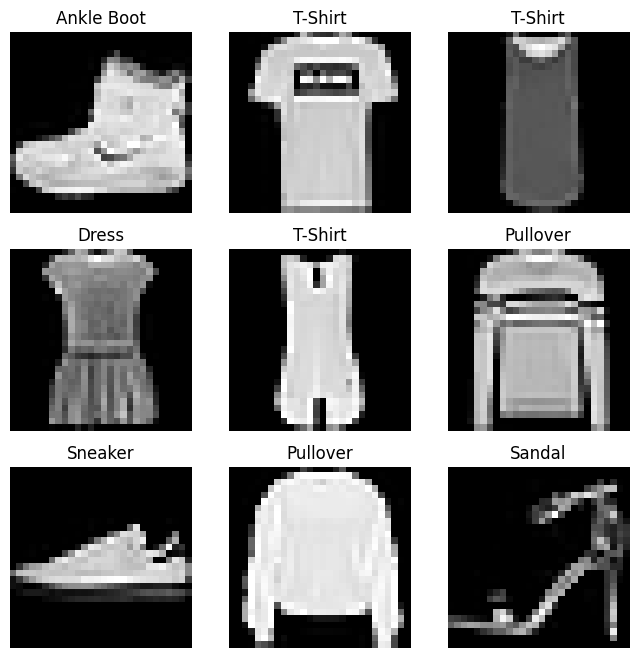

In [54]:
training_data = datasets.FashionMNIST(
    root="D:\\pytorch_data\\fashion-mnist\\data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="D:\\pytorch_data\\fashion-mnist\\data",
    train=False,
    download=True,
    transform=ToTensor()
)
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
total_len = len(training_data)
print(total_len)
showImgs_subplot(labels_map,0,training_data,3,3)


## CIFAR10(10种物品，彩色图像)

Files already downloaded and verified
torch.Size([4, 3, 32, 32])
torch.Size([3, 36, 138])
npimg.shape (3, 36, 138)
(36, 138, 3)


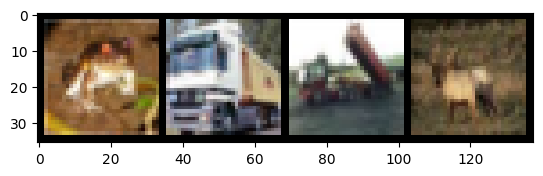

frog  truck truck deer 


In [61]:

batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='D:\\pytorch_data\\cifar10\\data', train=True,
                                        download=True, transform=ToTensor())
# shuffle控制是不是随机的
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=False, num_workers=0)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

showImgs_make_grid(trainloader, classes)


## 数字(mnist)

60000
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


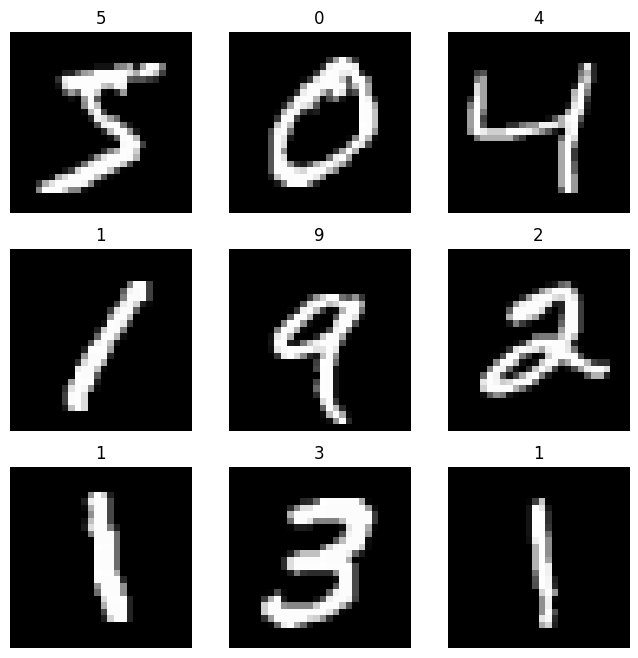

In [93]:
# MNIST数据是属于torchvision包自带的数据，所以可以直接调用。
# 在调用自己的数据的时候，我们可以用torchvision.datasets.ImageFolder或者torch.utils.data.TensorDataset来加载
train_dataset = datasets.MNIST(root='D:\\pytorch_data\\mnist\\data',  #文件存放路径
                            train=True,   #提取训练集
                            transform=ToTensor(),  #将图像转化为Tensor，在加载数据的时候，就可以对图像做预处理
                            download=True) #当找不到文件的时候，自动下载

# 加载测试数据集
test_dataset = datasets.MNIST(root='D:\\pytorch_data\\mnist\\data', 
                           train=False, 
                           download=True,
                           transform=ToTensor())
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
total_len = len(train_dataset)
print(total_len)
showImgs_subplot(labels_map,0,train_dataset,3,3)

## 扩展数字(EMNIST)

240000
240000
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


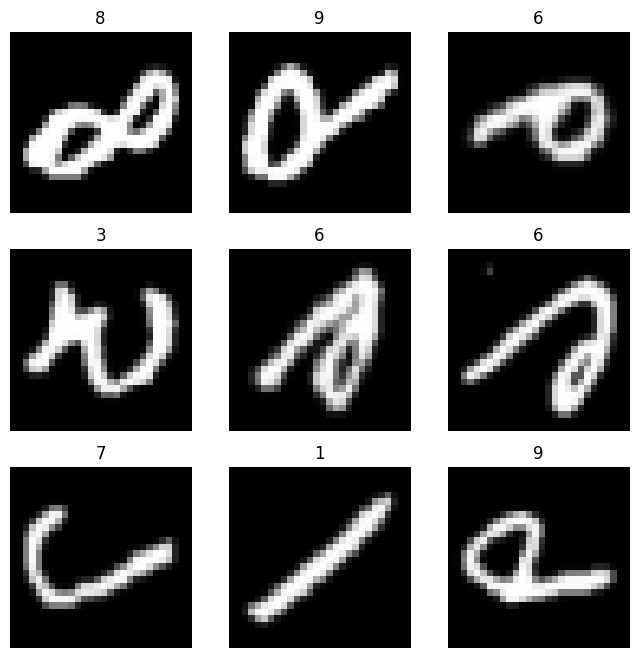

In [95]:
emnist_dataset = datasets.EMNIST('D:\\pytorch_data\\emnist\\data', split="digits", train=True, download=True, transform=ToTensor())
dataset_len = len(emnist_dataset.data)
print(dataset_len) #240000条数据
labels_map = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}
total_len = len(emnist_dataset)
print(total_len)
showImgs_subplot(labels_map,0,emnist_dataset,3,3)

# 目录中的图片作为数据集
https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html

D:\GitHub\book_DeepLearning_in_PyTorch_Source
torch.Size([1, 3, 600, 800])
torch.Size([3, 600, 800])
npimg.shape (3, 600, 800)
(600, 800, 3)


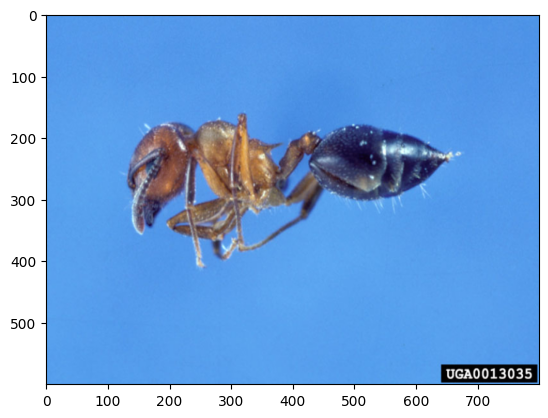

ants 


In [87]:
file_dir = os.path.split(os.path.abspath('.'))[0]
print(file_dir)
data_path = os.path.join(file_dir, "06_Transfer Learning/data")

# https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html
train_dataset = datasets.ImageFolder(os.path.join(data_path, 'train'),
                                     transforms.Compose([
                                        
                                        transforms.Resize((600,800)),
                                        transforms.ToTensor(),
                                        
                                    ])
                                    )
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 1, shuffle = False, num_workers=0)

showImgs_make_grid(train_loader, train_dataset.classes)


# 遍历datasetLoader
## 使用item和next遍历

<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>
Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


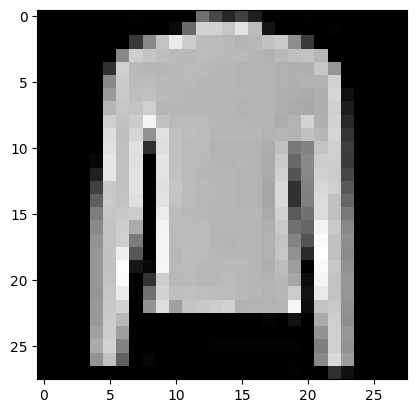

Label: 2


In [27]:
training_data = datasets.FashionMNIST(
    root="D:\\pytorch_data\\fashion-mnist\\data",
    train=True,
    download=True,
    transform=ToTensor()
)
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
# Display image and label.
it1 = iter(train_dataloader)
print(type(it1))
train_features, train_labels = next(it1)
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")


## 使用enumerate遍历

In [40]:
for batch_idx, (data, target) in enumerate(train_dataloader):  #针对容器中的每一个批进行循环
    print(batch_idx)
    print(data.shape)
    print(target.shape)
    if batch_idx==5:
        break

0
torch.Size([64, 1, 28, 28])
torch.Size([64])
1
torch.Size([64, 1, 28, 28])
torch.Size([64])
2
torch.Size([64, 1, 28, 28])
torch.Size([64])
3
torch.Size([64, 1, 28, 28])
torch.Size([64])
4
torch.Size([64, 1, 28, 28])
torch.Size([64])
5
torch.Size([64, 1, 28, 28])
torch.Size([64])


# 数据采样

In [ ]:
# 加载测试数据集
test_dataset = dsets.MNIST(root='D:\\pytorch_data\\mnist\\data', 
                           train=False, 
                           transform=transforms.ToTensor())
indices = range(len(test_dataset))
# 前5000
indices_val = indices[:5000]
# 后5000
indices_test = indices[5000:]

# 根据这些下标，构造两个数据集的SubsetRandomSampler采样器，它会对下标进行采样
# https://pytorch.org/docs/stable/data.html#torch.utils.data.SubsetRandomSampler
sampler_val = torch.utils.data.sampler.SubsetRandomSampler(indices_val)
sampler_test = torch.utils.data.sampler.SubsetRandomSampler(indices_test)

# 根据两个采样器来定义加载器，注意将sampler_val和sampler_test分别赋值给了validation_loader和test_loader
validation_loader = torch.utils.data.DataLoader(dataset =test_dataset,
                                                batch_size = batch_size,
                                                sampler = sampler_val
                                               )
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          sampler = sampler_test
                                         )